In [1]:
print("JMD")

JMD


In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [3]:
import tensorflow as tf 
import tensorflow.keras as keras

In [ ]:
import zipfile
zip_file=zipfile.ZipFile('crimedataset.zip')
zip_file.extractall('temp')

In [4]:
import os 
class_name=os.listdir('temp')
print(class_name)

['Test', 'Train']


In [65]:
class_name=os.listdir('temp/Train')
print(class_name)

['Arrest', 'Arson', 'Assault', 'Burglary', 'Explosion', 'Fighting', 'NormalVideos', 'RoadAccidents', 'Robbery', 'Shooting', 'Shoplifting', 'Stealing', 'Vandalism']


In [66]:
class_name=os.listdir('temp/Test')
print(class_name)

['Arrest', 'Arson', 'Assault', 'Burglary', 'Explosion', 'Fighting', 'NormalVideos', 'RoadAccidents', 'Robbery', 'Shooting', 'Shoplifting', 'Stealing', 'Vandalism']


In [7]:
aa='temp/Train/Abuse'
bb=len([f for f in os.listdir(aa)if 'Abuse' in f])
print(bb)

19076


In [33]:
aa='temp/Train/Arrest'
bb=len([f for f in os.listdir(aa)if 'Arrest' in f])
print(bb)

26397


In [5]:
import os
import PIL
from PIL import Image

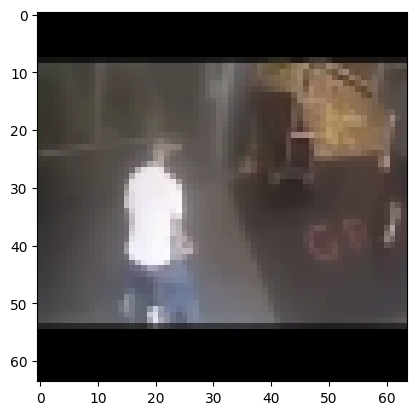

In [6]:
directory='temp/Train/Arrest'
files=os.listdir(directory)
image_file=os.path.join(directory,files[8])
image=Image.open(image_file)
plt.imshow(image)
plt.show()

In [7]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [9]:
train_data_dir='temp/Train'
val_data_dir='temp/Test'

In [10]:
img_size=(65,65)
batch_size=32

In [11]:
train_datagen=ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

In [12]:
val_datagen=ImageDataGenerator(rescale=1./255)

In [13]:
train_generator=train_datagen.flow_from_directory(train_data_dir,
                                                  target_size=img_size,
                                                  batch_size=batch_size,
                                                  class_mode='categorical')

Found 1247269 images belonging to 13 classes.


In [45]:
from collections import Counter

In [46]:
fc=Counter(train_generator.filenames)
duplicates=[filename for filename,count in fc.items()if count>1]

print('found',len(duplicates),'duplicates')

found 0 duplicates


In [14]:
val_generator=val_datagen.flow_from_directory(val_data_dir,
                                                  target_size=img_size,
                                                  batch_size=batch_size,
                                                  class_mode='categorical')

Found 47956 images belonging to 13 classes.


In [47]:
fc=Counter(val_generator.filenames)
duplicates=[filename for filename,count in fc.items()if count>1]

print('found',len(duplicates),'duplicates')

found 0 duplicates


In [15]:
images,labels=next(train_generator)
print(images.min(),images.max())

0.0 1.0


Label: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


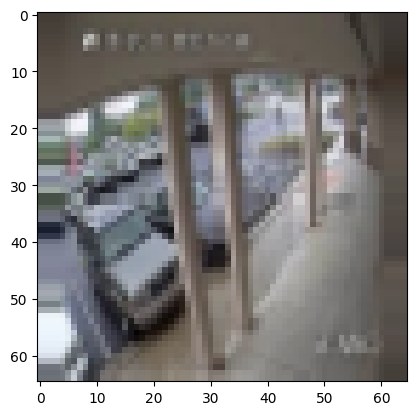

In [23]:
images,labels=next(train_generator)
plt.imshow(images[7])

plt.show()

In [15]:
input_shape=(None,65,65,1)
output_shape=(None,13)

In [16]:
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten 

In [20]:
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(65, 65 ,3)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(output_shape[1],activation='softmax'))

In [21]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [17]:
import scipy


In [22]:
history=model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=5,
    validation_data=val_generator,
    validation_steps=len(val_generator)
    ,
    
)

Epoch 1/5
38978/38978 [==============================] - 7873s 202ms/step - loss: 0.1559 - accuracy: 0.9569 - val_loss: 9.6334 - val_accuracy: 0.0836
Epoch 2/5
38978/38978 [==============================] - 7276s 187ms/step - loss: 0.0536 - accuracy: 0.9850 - val_loss: 11.5664 - val_accuracy: 0.0784
Epoch 3/5
38978/38978 [==============================] - 7355s 189ms/step - loss: 0.0428 - accuracy: 0.9883 - val_loss: 12.5126 - val_accuracy: 0.0715
Epoch 4/5
38978/38978 [==============================] - 7459s 191ms/step - loss: 0.0378 - accuracy: 0.9898 - val_loss: 13.8765 - val_accuracy: 0.0717
Epoch 5/5
38978/38978 [==============================] - 7427s 191ms/step - loss: 0.0358 - accuracy: 0.9905 - val_loss: 17.4437 - val_accuracy: 0.0623


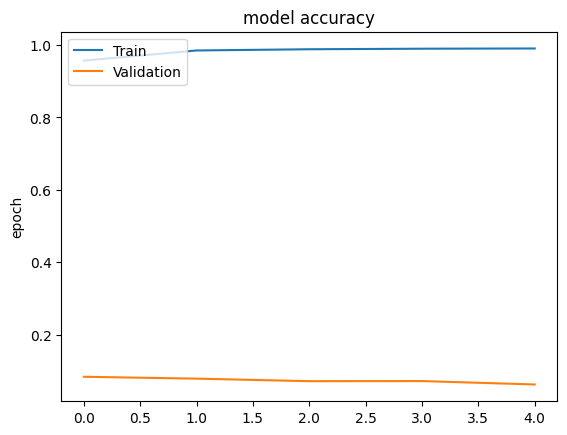

In [24]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.ylabel('epoch')
plt.legend(['Train','Validation'],loc='upper left')
plt.show()

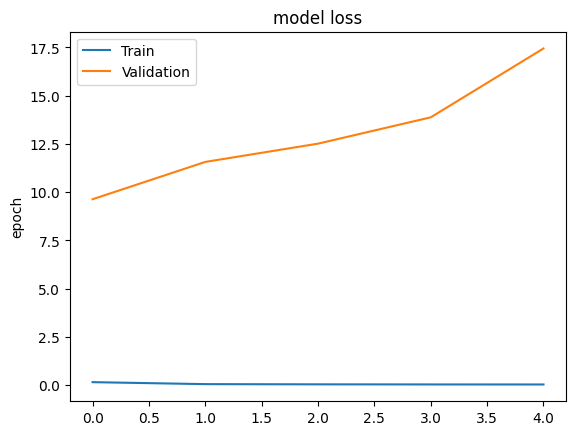

In [25]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('accuracy')
plt.ylabel('epoch')
plt.legend(['Train','Validation'],loc='upper left')
plt.show()

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import L2



In [31]:
from tensorflow.keras import regularizers
from tensorflow.keras.regularizers import L2
from tensorflow.keras.layers import Dropout

In [48]:
Model=Sequential()
Model.add(Conv2D(32,(3,3),activation='relu',input_shape=(65, 65 ,3)))
Model.add(MaxPooling2D((2,2)))
Model.add(Conv2D(64,(3,3),activation='relu'))
Model.add(MaxPooling2D((2,2)))
Model.add(Conv2D(128,(3,3),activation='relu'))
Model.add(MaxPooling2D((2,2)))
Model.add(Flatten())
Model.add(Dense(128,activation='relu',kernel_regularizer=regularizers.L2(0.1)))
Model.add(Dropout(0.5))
Model.add(Dense(13,activation='softmax',kernel_regularizer=regularizers.L2(0.01)))

        

In [52]:
Model.compile(optimizer=Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [53]:
early_stop=EarlyStopping(monitor='val_loss',patience=3)

In [39]:
Model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 63, 63, 32)        896       
                                                                 
 max_pooling2d_21 (MaxPooli  (None, 31, 31, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_22 (Conv2D)          (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_22 (MaxPooli  (None, 14, 14, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_23 (Conv2D)          (None, 12, 12, 128)       73856     
                                                                 
 max_pooling2d_23 (MaxPooli  (None, 6, 6, 128)        

In [54]:
History=Model.fit(train_generator,
                  batch_size=32,
                  epochs=20,
                  validation_data=val_generator,
                  callbacks=[early_stop])

Epoch 1/20
38978/38978 [==============================] - 7530s 193ms/step - loss: 0.9506 - accuracy: 0.7599 - val_loss: 4.5620 - val_accuracy: 0.0334
Epoch 2/20
38978/38978 [==============================] - 7569s 194ms/step - loss: 0.9296 - accuracy: 0.7604 - val_loss: 4.3451 - val_accuracy: 0.0336
Epoch 3/20
38978/38978 [==============================] - 7634s 196ms/step - loss: 0.9202 - accuracy: 0.7680 - val_loss: 4.9333 - val_accuracy: 0.0338
Epoch 4/20
38978/38978 [==============================] - 7638s 196ms/step - loss: 0.9156 - accuracy: 0.7756 - val_loss: 4.1994 - val_accuracy: 0.0434
Epoch 5/20
38978/38978 [==============================] - 7791s 200ms/step - loss: 0.9239 - accuracy: 0.7851 - val_loss: 4.7909 - val_accuracy: 0.0424
Epoch 6/20
38978/38978 [==============================] - 7524s 193ms/step - loss: 0.9271 - accuracy: 0.7903 - val_loss: 4.7289 - val_accuracy: 0.0404
Epoch 7/20
38978/38978 [==============================] - 7846s 201ms/step - loss: 0.9253 - ac

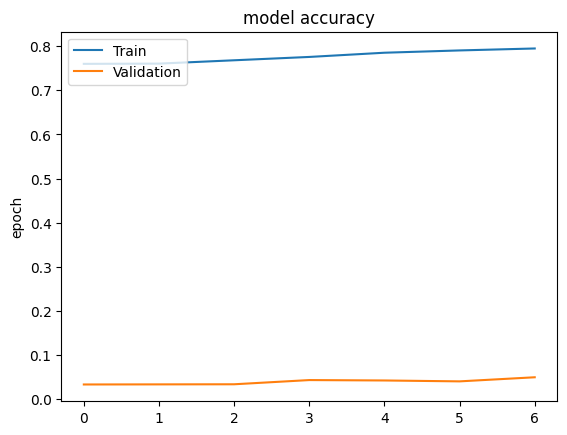

In [55]:
plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.ylabel('epoch')
plt.legend(['Train','Validation'],loc='upper left')
plt.show()

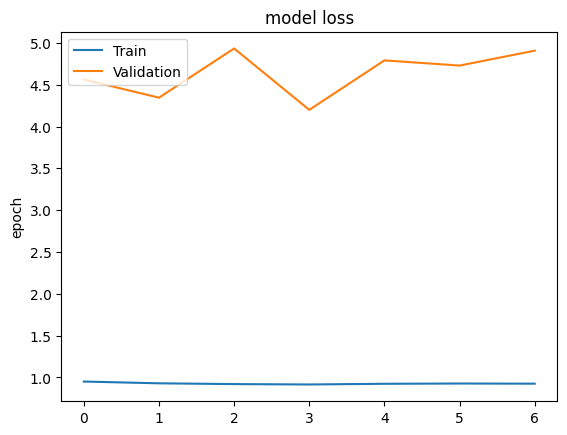

In [56]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.ylabel('epoch')
plt.legend(['Train','Validation'],loc='upper left')
plt.show()

In [76]:
class_names={
    0:'Arrest', 
    1: 'Arson', 
    2: 'Assault', 
    3: 'Burglary', 
    4:'Explosion',
    5: 'Fighting',
    6:'NormalVideos',
    7:'RoadAccidents',
    8:'Robbery',
    9:'Shooting',
    10:'Shoplifting',
    11:'Stealing',
    12:'Vandalism'
   
}



In [94]:
from PIL import Image
new=Image.open('ra.jpg')
new=new.resize((65,65))
new_array=np.array(new)
new_array=new_array/255.0
new_array=np.expand_dims(new_array,axis=0)

In [102]:
prediction=Model.predict(new_array)
predicted_class=np.argmax(prediction)

cn=class_names[predicted_class]
print(cn)

1/1 [==============================] - 0s 29ms/step
NormalVideos
